# **Telco Customer Churn Prediction**
Created by Farin Cyntiya Garini

<center><img src="https://i.postimg.cc/SNWm53qX/leading-causes-of-churn.png"></center>

Source: [retently.com](https://www.retently.com/blog/three-leading-causes-churn/)


---
## **Business Understanding**

### Problem Statement
The current state of the company's loss is caused by the large number of customers who unsubscribed or what's known as churn. Thus, we need to understand why churn occurred in large numbers so that Telco Company can plan customers treatment better to make them remain loyal (keep subscribing to Telco Company's services).

### Business Metric
The monitored business metric is the proportion of customer churn.

### Model Definition
The model created is to predict whether customers will churn.


---
## **Data Understanding**

### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata. Thedata set includes information about:
* Customers who left within the last month – the column is called Churn.
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
* Demographic info about customers – gender, age range, and if they have partners and dependents.

### Columns
  - customerID: customer ID
  - gender: Gender
  - SeniorCitizen: Whether the customer is old (1, 0)
  - Partner: Whether the customer has a partner (Yes, No)
  - Dependents: Whether the customer has dependents (Yes, No)
  - tenure: Number of months the customer has stayed with the company
  - PhoneService: Whether the customer has telephone service (Yes, No)
  - MultipleLines: Whether the customer has multiple lines (Yes, No, No phone service)
  - InternetService: Customer's internet service provider (DSL, Fiber optic, No)
  - OnlineSecurity: Whether the customer has online security (Yes, No, No internet service)
  - OnlineBackup: Whether the customer has online backup (Yes, No, No internet service)
  - DeviceProtection: Whether the customer has device protection (Yes, No, No internet service)
  - TechSupport: Whether the customer has technical support (Yes, No, No internet service)
  - StreamingTV: Whether the customer has streaming TV (Yes, No, No internet service)
  - StreamingMovies : Whether the customer has streaming movies (Yes, No, No internet service)
  - Contract: The contract term of the customer (Month to month, One year, Two years)
  - PaperlessBilling: Whether the customer has paperless billing (Yes, No)
  - PaymentMethod: The customer’s payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
  - MonthlyCharges: The amount charged to the customer monthly
  - TotalCharges: The total amount charged to the customer
  - Churn: Whether the customer churned (Yes or No)

### Detail
* Each row represents a customer, each column contains customer’s attributes (described on the previous point).
* The raw data contains 7043 rows (customers) and 21 columns (features).
* The “Churn” column is the target.

---
## **Data Preparation**

### Import Libraries

In [1]:
import pandas as pd 
pd.set_option('max_columns',None)
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style("whitegrid")

### Read Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/farincyntiya/customer-churn-prediction/main/Telco%20Customer%20Churn.csv', delimiter = ",")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Check Data

In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data type for TotalCharges is incorrect, it should be float64 rather than object, therefore the data type needs to be converted.

In [4]:
# Find missing values (data filled only with spaces)
df[df['TotalCharges']==' '].shape[0]

11

Before converting the data type for TotalCharges, the missing values are replaced by np.nan (NaN values in numpy array).

In [5]:
# Replace missing values with numpy's NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

After replacing the missing values of TotalCharges with NaNs, the data type can be converted.

In [6]:
# Convert data type
df['TotalCharges'] = df['TotalCharges'].astype('float64')

# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Summary Data

In [7]:
# Numerical data summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# Categorical data summary statistics
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


### Missing Values, Duplicated Data, and Data Inconsistency

In [9]:
# Check missing values
df.isnull().sum()
# Percentage: 100*(df.isnull().sum()/len(df))

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in TotalCharges, while there are none for other variables. This is because earlier the data which filled with spaces in TotalCharges were replaced by NaNs. Thus, the missing values are imputed with the median as follows.

In [10]:
# Missing values imputation with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Check duplicated data
df.duplicated().sum()

0

The data doesn't have duplicated values. The unique values of the data are obtained as follows.

In [12]:
# Check data consistency by looping
for x in df.columns:
    print(f"{x}'s unique values:")
    print(f'{df[x].unique()}')
    print('='*80)

customerID's unique values:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender's unique values:
['Female' 'Male']
SeniorCitizen's unique values:
[0 1]
Partner's unique values:
['Yes' 'No']
Dependents's unique values:
['No' 'Yes']
tenure's unique values:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService's unique values:
['No' 'Yes']
MultipleLines's unique values:
['No phone service' 'No' 'Yes']
InternetService's unique values:
['DSL' 'Fiber optic' 'No']
OnlineSecurity's unique values:
['No' 'Yes' 'No internet service']
OnlineBackup's unique values:
['Yes' 'No' 'No internet service']
DeviceProtection's unique values:
['No' 'Yes' 'No internet service']
TechSupport's unique values:
['No' 'Yes' 'No internet service']
StreamingTV's unique values:
['No' 'Yes' 'No inter

The MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies columns have data inconsistencies (No & No internet services), therefore the data needs to be modified as follows, along with the conversion of customer churning as 1, and not churning as 0.

In [13]:
# Handle data inconsistencies
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service','No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service','No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service','No')
df['TechSupport'] = df['TechSupport'].replace('No internet service','No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service','No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service','No')
df['PaymentMethod'] = df['PaymentMethod'].replace(['Bank transfer (automatic)','Credit card (automatic)'],['Bank transfer','Credit card'])

# Transform Churn data
df["Churn"] = df["Churn"].map({'Yes':1,'No':0})

In [14]:
# Check data consistency by looping
for x in df.columns:
    print(f"{x}'s unique values:")
    print(f'{df[x].unique()}')
    print('='*80)

customerID's unique values:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender's unique values:
['Female' 'Male']
SeniorCitizen's unique values:
[0 1]
Partner's unique values:
['Yes' 'No']
Dependents's unique values:
['No' 'Yes']
tenure's unique values:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService's unique values:
['No' 'Yes']
MultipleLines's unique values:
['No' 'Yes']
InternetService's unique values:
['DSL' 'Fiber optic' 'No']
OnlineSecurity's unique values:
['No' 'Yes']
OnlineBackup's unique values:
['Yes' 'No']
DeviceProtection's unique values:
['No' 'Yes']
TechSupport's unique values:
['No' 'Yes']
StreamingTV's unique values:
['No' 'Yes']
StreamingMovies's unique values:
['No' 'Yes']
Contract's unique values:
['Month-to-month' 'One year' 'Two year']
Pa

### Feature Engineering

The services provided by Telco Company based on the data are Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies. The feature engineering is performed to get the number of Total Services subscribed by each customer.

In [15]:
# Drop customerID
df.drop('customerID', inplace=True, axis=1)

In [16]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']

In [17]:
df["PhoneService"] = df["PhoneService"].map({'Yes':1, 'No':0})
df["MultipleLines"] = df["MultipleLines"].map({'Yes':1, 'No':0})
df["InternetService"] = df["InternetService"].map({'DSL':1, 'Fiber optic':1, 'No':0})
df["OnlineSecurity"] = df["OnlineSecurity"].map({'Yes':1, 'No':0})
df["OnlineBackup"] = df["OnlineBackup"].map({'Yes':1, 'No':0})
df["DeviceProtection"] = df["DeviceProtection"].map({'Yes':1, 'No':0})
df["TechSupport"] = df["TechSupport"].map({'Yes':1, 'No':0})
df["StreamingTV"] = df["StreamingTV"].map({'Yes':1, 'No':0})
df["StreamingMovies"] = df["StreamingMovies"].map({'Yes':1, 'No':0})

In [18]:
df['TotalServices'] = df[services].sum(axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,Female,0,Yes,No,1,0,0,1,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,2
1,Male,0,No,No,34,1,0,1,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,0,4
2,Male,0,No,No,2,1,0,1,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,4
3,Male,0,No,No,45,0,0,1,1,0,1,1,0,0,One year,No,Bank transfer,42.30,1840.75,0,4
4,Female,0,No,No,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,2


### Exploratory Data Analysis

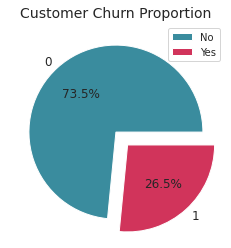

In [19]:
# Customer churn proportion
churn = df['Churn'].value_counts()
labels = df['Churn'].value_counts().index
explode = [0,0.2]
colors = ['#3a8c9e','#d1345b']

plt.title('Customer Churn Proportion', fontsize=14)
plt.pie(churn, labels=labels, explode=explode, colors=colors,
        autopct='%.1f%%', textprops={'fontsize':12})
L = plt.legend()
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')
plt.show() 

In [20]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

From a total of 7043 customers, there were 73.5% or 5174 customers decided not to churn, and 26.5% or 1869 customers decided to churn.

In [21]:
# Separate numerical and categorical variables
num = df.select_dtypes(include=['int', 'float']).columns
cat = df.select_dtypes(include=['object']).columns
print('Numerical variables: \n', num,
      '\n\nCategorical variables: \n', cat)

Numerical variables: 
 Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'TotalServices'],
      dtype='object') 

Categorical variables: 
 Index(['gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')


To separate between numerical and categorical variables, we can also use:

```
nums = [col for col in df.columns if df[col].dtype != 'object']
cats = [col for col in df.columns if (df[col].dtype == 'object') & (col not in ['customerID'])]
```



In [22]:
num = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices']
cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 
       'PaperlessBilling', 'PaymentMethod']

#### **Univariate Analysis**

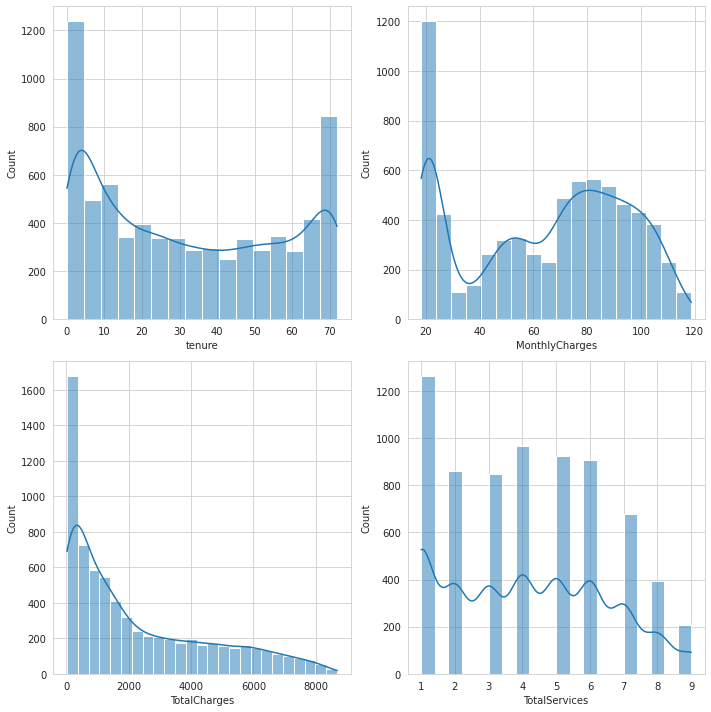

In [23]:
# Numerical variables distribution
plt.figure(figsize=(10,10))
for x in range(0,len(num)):
    plt.subplot(2,2,x+1)
    sns.histplot(data=df, x=df[num[x]], kde=True)
plt.tight_layout()

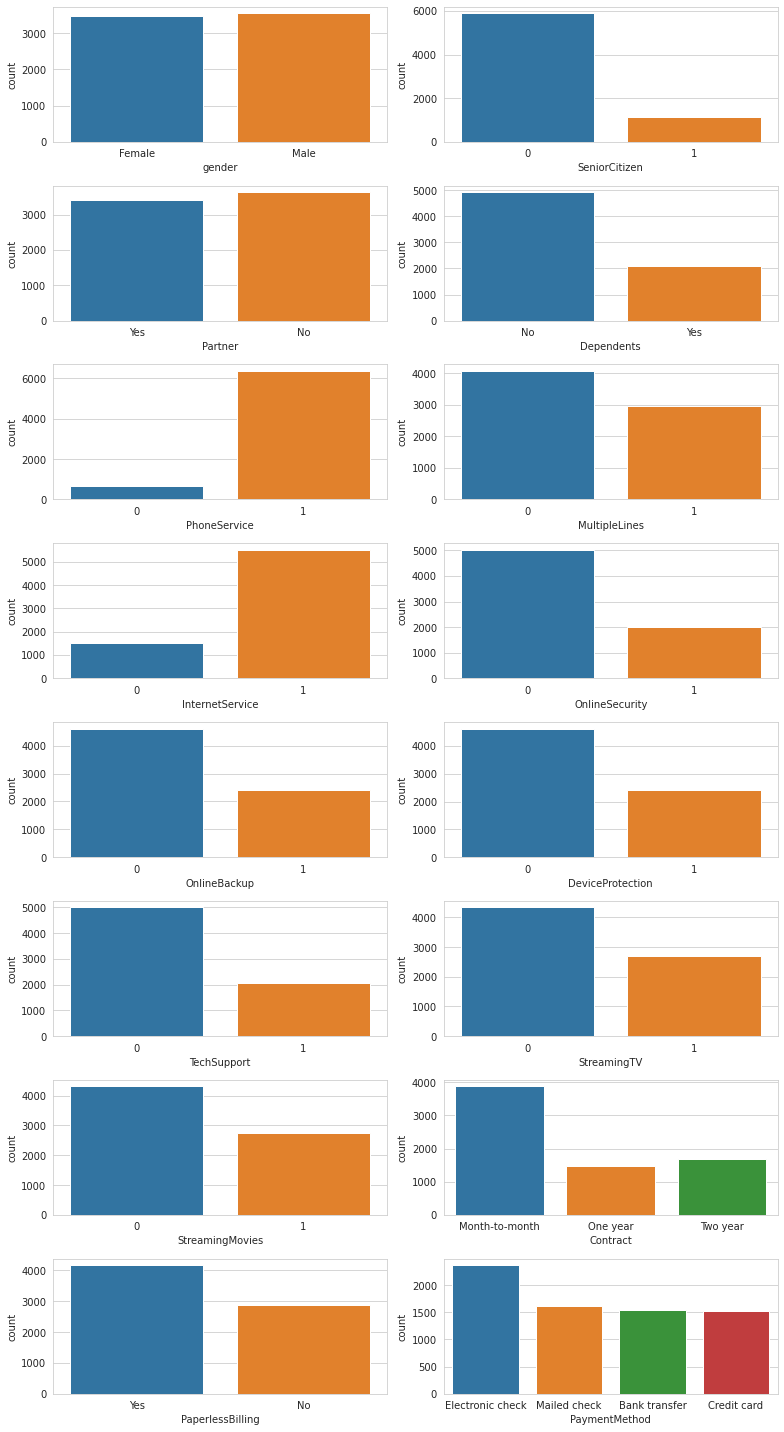

In [24]:
# Categorical variables distribution
plt.figure(figsize=(11,20))
for x in range(0,len(cat)):
    plt.subplot(8,2,x+1)
    sns.countplot(data=df, x=df[cat[x]])
plt.tight_layout()

#### **Bivariate Analysis**

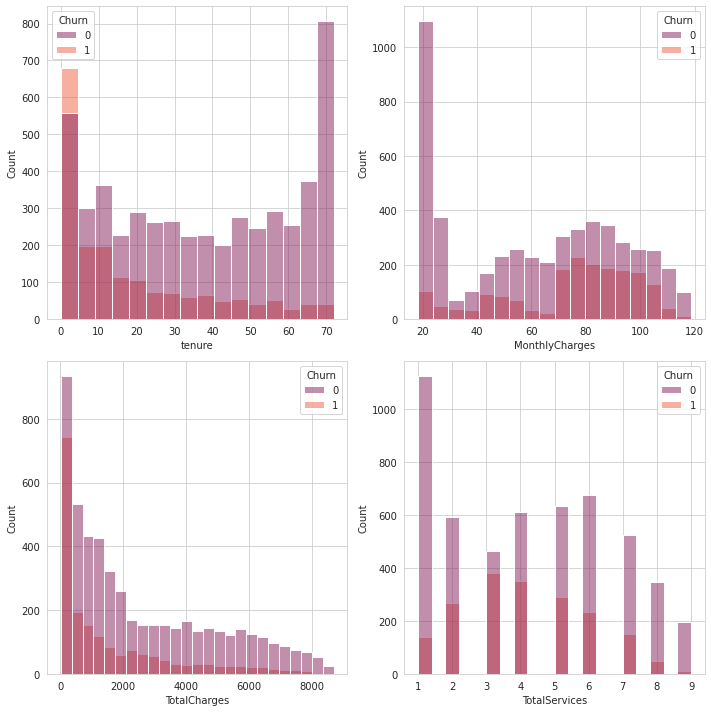

In [25]:
# Numeric variables vs. Churn
plt.figure(figsize=(10,10))
for x in range(0,len(num)):
    plt.subplot(2,2,x+1)
    sns.histplot(data=df, x=df[num[x]], hue='Churn', palette='rocket')
plt.tight_layout()

From the subscription information of Telco Company's customers, it's seen that:
- Tenure: Customers who churned stay with the company for less amount of time than those who didn't, most churn occurs in the first 0 to 5 months the customers subscribed.
- Monthly Charges: Customers who pay the monthly charges between 70 and 100 are less likely to churn than others, and those who have higher monthly charges are more likely to churn.
- Total Charges: The higher the total amount charged to the customers, the more likely the customers are to churn.
- Total Services: Customers who subscribed to 3 to 4 services are less likely to churn than others.

In [26]:
for x in num:
    print(df.groupby([x]).agg({'Churn':['count','sum','mean']}))
    print('='*80)

       Churn               
       count  sum      mean
tenure                     
0         11    0  0.000000
1        613  380  0.619902
2        238  123  0.516807
3        200   94  0.470000
4        176   83  0.471591
...      ...  ...       ...
68       100    9  0.090000
69        95    8  0.084211
70       119   11  0.092437
71       170    6  0.035294
72       362    6  0.016575

[73 rows x 3 columns]
               Churn         
               count sum mean
MonthlyCharges               
18.25              1   0  0.0
18.40              1   0  0.0
18.55              1   0  0.0
18.70              2   0  0.0
18.75              1   0  0.0
...              ...  ..  ...
118.20             1   0  0.0
118.35             1   1  1.0
118.60             2   0  0.0
118.65             1   0  0.0
118.75             1   0  0.0

[1585 rows x 3 columns]
             Churn         
             count sum mean
TotalCharges               
18.80            1   0  0.0
18.85            2   1  0.5


Customers who subscribe to 2 to 4 services tend to have higher churn rates of 30- 45%.

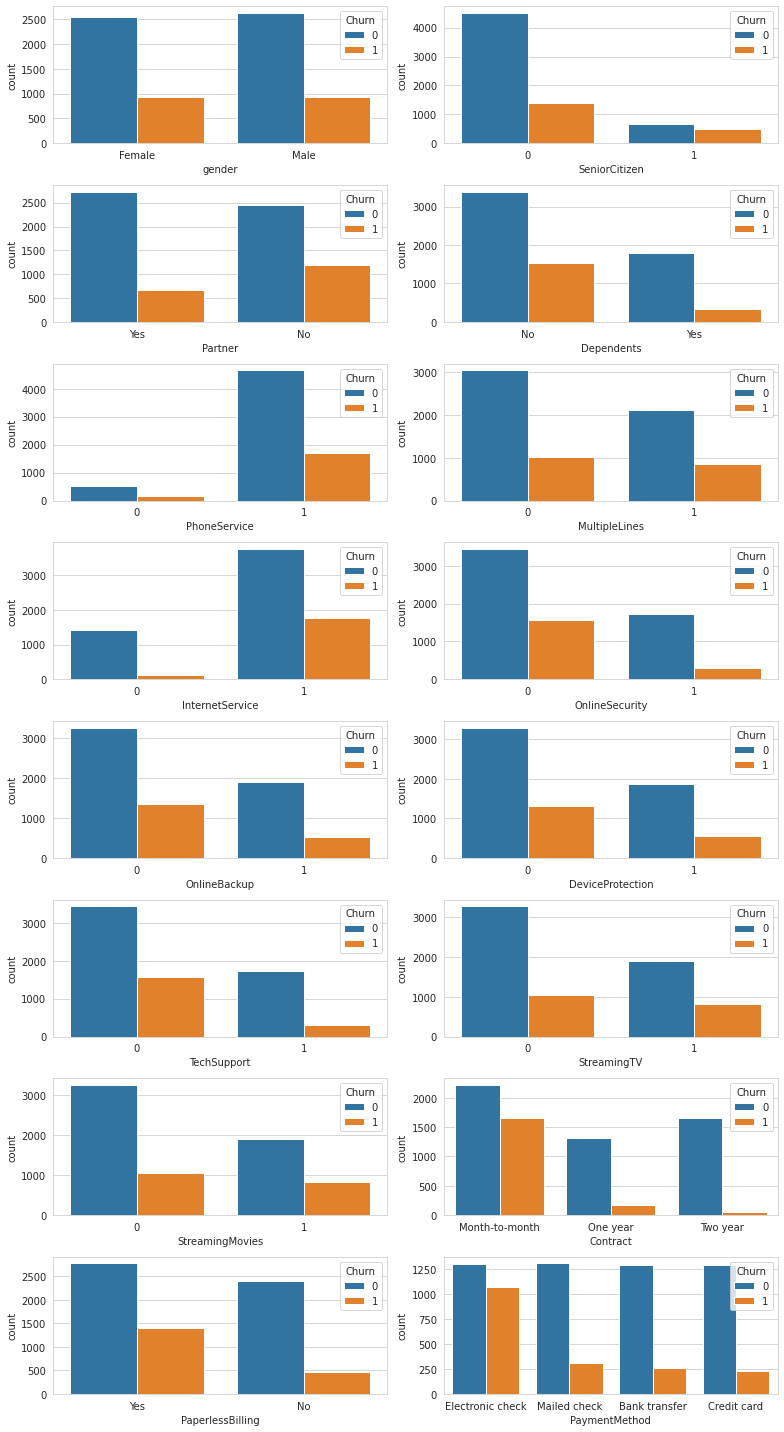

In [27]:
# Categorical variables vs. Churn
plt.figure(figsize=(11,20))
for x in range(0,len(cat)):
    plt.subplot(8,2,x+1)
    sns.countplot(data=df, x=df[cat[x]], hue='Churn')
plt.tight_layout()

From the demographic of Telco Company's Customers, it's seen that:
- Gender: The customer gender is equally distributed between Male and Female customers. The customer churn in both gender types is composed similarly.
- Senior Citizen: The senior citizen is less than the younger citizen and they are more likely to churn.
- Partner: There are more customers who have partners than those who don't and they are less likely to churn.
- Dependents: The majority of the customers don't have dependents and the customers who have dependents are more likely to churn than those who don't.

From the services of Telco Company's customers, it's seen that:
- Multiple Lines, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies: Customers who are not signed up for these services are more likely to churn, this indicates that these services can be promoted more by Telco Company to higher the customer's subscription rate, then monitor further the improvement it will bring to the rate of customer churn.
- Phone Service and Internet Service (DSL & Fiber Optic): Customers who signed up for these services are more likely to churn, this indicates that these services need improvements to lower the churn rate.

From the account information of Telco Company's customers, it's seen that:
- Contract: Customers who have month to month contracts are more likely to churn than the others.
- Paperless Billing: Customers who have paperless billing are also more likely to churn.
- Payment Method: Customers with electronic checks as the payment method are more likely to churn.

In [28]:
for x in cat:
    print(df.groupby([x]).agg({'Churn':['count','sum','mean']}))
    print('='*80)

       Churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603
              Churn                
              count   sum      mean
SeniorCitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813
        Churn                
        count   sum      mean
Partner                      
No       3641  1200  0.329580
Yes      3402   669  0.196649
           Churn                
           count   sum      mean
Dependents                      
No          4933  1543  0.312791
Yes         2110   326  0.154502
             Churn                
             count   sum      mean
PhoneService                      
0              682   170  0.249267
1             6361  1699  0.267096
              Churn                
              count   sum      mean
MultipleLines                      
0              4072  1019  0.250246
1              2971   850  0.286099
          

Customers who have Month-to-month contracts have higher churn tendencies with a 42.7% average rate compared to one-year and two-year contracts. Additionally, customers who pay with electronic checks also have higher churn rates of 45.3% than customers who pay with other methods.

#### **Multivariate Analysis**

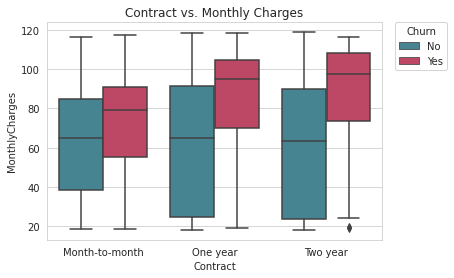

In [29]:
palette = ['#3a8c9e','#d1345b']

sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn', palette=palette)
plt.title('Contract vs. Monthly Charges')
L = plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')
L.set_title('Churn')

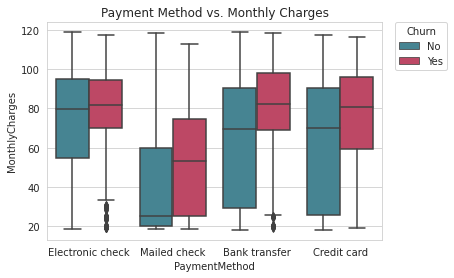

In [30]:
sns.boxplot(data=df, x='PaymentMethod', y='MonthlyCharges', hue='Churn', palette=palette)
plt.title('Payment Method vs. Monthly Charges')
L = plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')
L.set_title('Churn')

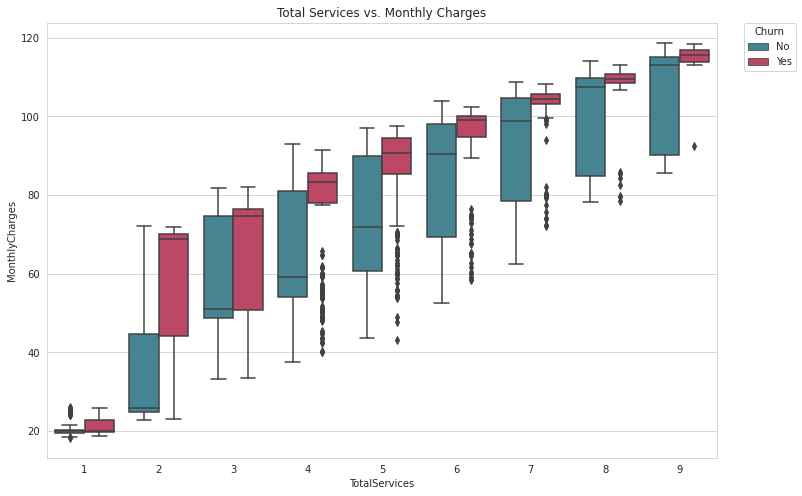

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='TotalServices', y='MonthlyCharges', hue='Churn', palette=palette)
plt.title('Total Services vs. Monthly Charges')
L = plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')
L.set_title('Churn')

In [32]:
df.groupby('TotalServices').agg({'Churn':['count','sum','mean']})

Churn               
              count  sum      mean
TotalServices                     
1              1264  138  0.109177
2               859  266  0.309662
3               846  380  0.449173
4               965  352  0.364767
5               922  289  0.313449
6               908  232  0.255507
7               676  152  0.224852
8               395   49  0.124051
9               208   11  0.052885

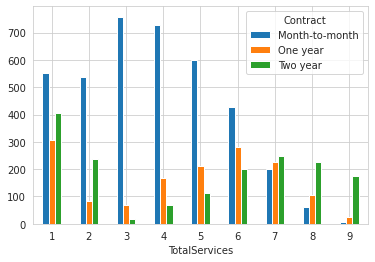

In [33]:
pd.crosstab(df.TotalServices, df.Contract).plot.bar(rot=0)

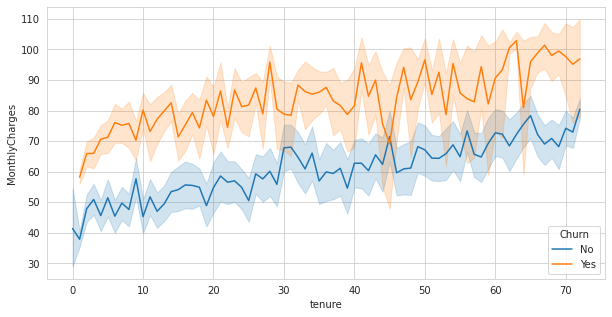

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
L = plt.legend(loc='lower right')
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')
L.set_title('Churn')

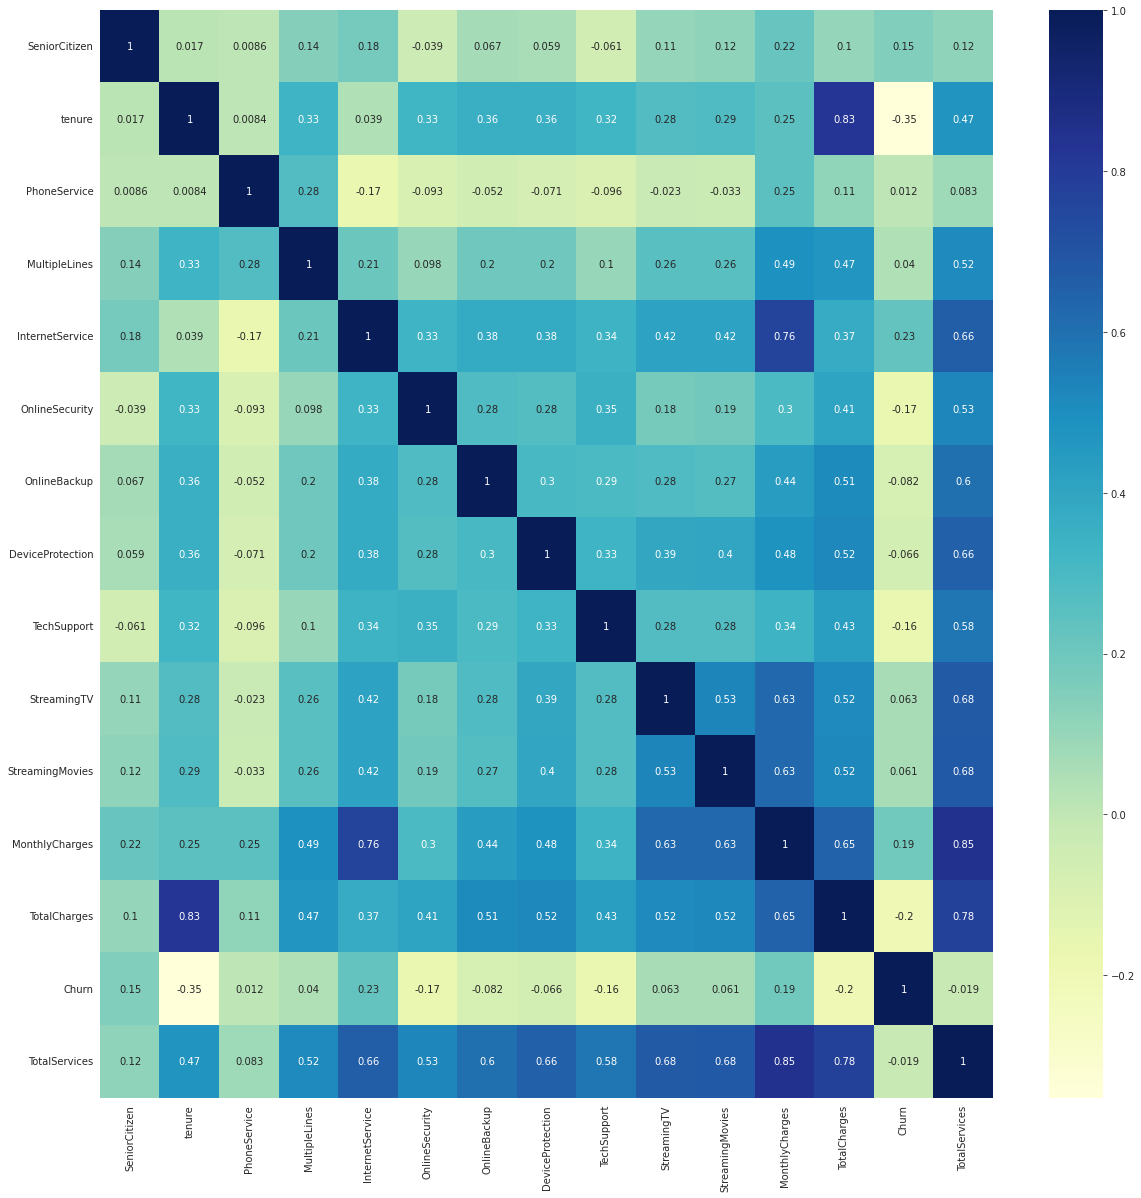

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

From the heatmap, it's seen that Total Services and Monthly Charges have a high correlation (0.85), as well as Total Charges and Tenure (0.83). It makes sense because these features measure customers' subscriptions and their loyalty to Telco Company. The more services that customers subscribed to, the higher the monthly charges they get. This also correlates with the number of months the customer has stayed with the company.

---
## **Modeling and Evaluation**

After going through the business understanding, data understanding, and data preparation, the next step is modeling and evaluation. Several predictive models, such as Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), XGBoost, AdaBoost, and Gradient Boosting are developed and the best one out of them will be decided after comparation of the key metrics as follows.

<center><img src="https://i.postimg.cc/qqxbPxFf/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png"></center>

[Source](https://www.tutorialexample.com/an-introduction-to-accuracy-precision-recall-f1-score-in-machine-learning-machine-learning-tutorial/)

F-score might be a better measure to use if seeking a balance between Precision and Recall is needed and there is an uneven class distribution (large number of Actual Negatives).

[Source](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)

AUC-ROC curve is also observed. AUC-ROC curve is a performance measurement for classification problems at various threshold settings. ROC (Receiver Operating Characteristics) is a probability curve and AUC (Area Under the Curve) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 

[Source](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

To ease the model interpretation, feature importance is also observed. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

[Source](https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285)

### Import Libraries

In [36]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

To compare models:


```
from pycaret.utils import enable_colab 
enable_colab()

# Initial Setup
from pycaret.classification import *
clf1 = setup(data=df, ignore_features=['customerID'], target='Churn', fix_imbalance=True, remove_outliers=True, feature_selection=True)

# Compare Models
best = compare_models(sort='F1')
```



### Initial Setup

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,Female,0,Yes,No,1,0,0,1,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,2
1,Male,0,No,No,34,1,0,1,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,0,4
2,Male,0,No,No,2,1,0,1,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,4
3,Male,0,No,No,45,0,0,1,1,0,1,1,0,0,One year,No,Bank transfer,42.30,1840.75,0,4
4,Female,0,No,No,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,2


The features gender, Partner, Dependents, Contract, PaperlessBilling, and PaymentMethod are all still categorical variables, they need to be converted to numerical variables. For Partner, Dependents, and PaperlessBilling, 'Yes' is replaced by 1 and 'No' is replaced by 0. For the rest, dummy variables are created.

In [38]:
df["Partner"] = df["Partner"].map({'Yes':1, 'No':0})
df["Dependents"] = df["Dependents"].map({'Yes':1, 'No':0})
df["PaperlessBilling"] = df["PaperlessBilling"].map({'Yes':1, 'No':0})

In [39]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalServices,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,29.85,29.85,0,2,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,56.95,1889.50,0,4,0,1,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,53.85,108.15,1,4,0,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,42.30,1840.75,0,4,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,151.65,1,2,1,0,1,0,0,0,0,1,0


In [40]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   7043 non-null   int64  
 1   Partner                         7043 non-null   int64  
 2   Dependents                      7043 non-null   int64  
 3   tenure                          7043 non-null   int64  
 4   PhoneService                    7043 non-null   int64  
 5   MultipleLines                   7043 non-null   int64  
 6   InternetService                 7043 non-null   int64  
 7   OnlineSecurity                  7043 non-null   int64  
 8   OnlineBackup                    7043 non-null   int64  
 9   DeviceProtection                7043 non-null   int64  
 10  TechSupport                     7043 non-null   int64  
 11  StreamingTV                     7043 non-null   int64  
 12  StreamingMovies                 70

The features tenure, MonthlyCharges, TotalCharges, and TotalServices are scaled so that the values all of them are within a range of 0 to 1 to avoid large value gaps between features.

In [41]:
var = ['tenure','MonthlyCharges','TotalCharges','TotalServices']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_dummies[var] = scaler.fit_transform(df_dummies[var])
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalServices,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.277445,0,0,1,0,1,0,0,0,0,1,-1.160323,-0.994242,0,-0.928083,1,0,1,0,0,0,0,1,0
1,0,0,0,0.066327,1,0,1,1,0,1,0,0,0,0,-0.259629,-0.173244,0,-0.063239,0,1,0,1,0,0,0,0,1
2,0,0,0,-1.236724,1,0,1,1,1,0,0,0,0,1,-0.362660,-0.959674,1,-0.063239,0,1,1,0,0,0,0,0,1
3,0,0,0,0.514251,0,0,1,1,0,1,1,0,0,0,-0.746535,-0.194766,0,-0.063239,0,1,0,1,0,1,0,0,0
4,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,1,0.197365,-0.940470,1,-0.928083,1,0,1,0,0,0,0,1,0


### Variables Definition

The features are separated into X and Y variables. In this case, Churn is the Y variable since it is the one to be predicted by the model, while the rest are assigned as X variables.



In [43]:
# Define variables
y = df_dummies['Churn']
X = df_dummies.drop(columns = ['Churn'])

### Split Data

The data is splitted into 70% training data and 30% testing data.

In [44]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Logistic Regression

Logistic Regression is used when the dependent variable is categorical ([source](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)).


#### **Model Creation**

In [45]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### **Prediction**

In [46]:
# Predict y (Churn)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

#### **Model Evaluation**

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3635
           1       0.66      0.53      0.59      1295

    accuracy                           0.80      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.80      0.80      0.80      4930

Accuracy (training):  0.8042596348884381
Precision (testing):  0.6889352818371608
Recall (training):  0.5343629343629344
F1-score (training):  0.5891868880374628


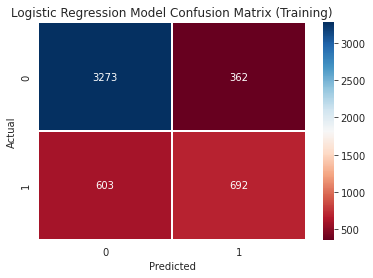

In [47]:
# Training evaluation
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Logistic Regression Model Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (training): ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (training): ", metrics.recall_score(y_train, y_train_pred))
print("F1-score (training): ", metrics.f1_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.57      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113

Accuracy (testing):  0.8140085186938003
Precision (testing):  0.6889352818371608
Recall (testing):  0.5749128919860628
F1-score (testing):  0.6267806267806267


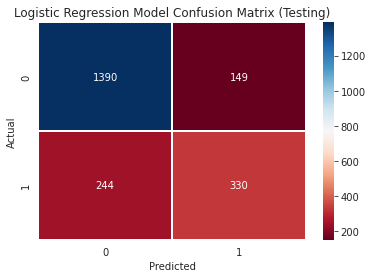

In [48]:
# Testing evaluation
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Logistic Regression Model Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (testing): ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (testing): ", metrics.recall_score(y_test, y_test_pred))
print("F1-score (testing): ", metrics.f1_score(y_test, y_test_pred))

#### **AUC-ROC Curve**

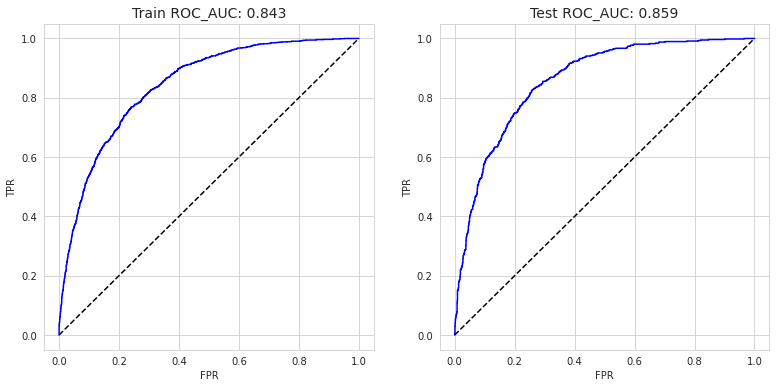

In [49]:
plot_roc_curve(X_train, y_train, X_test, y_test, lr_model)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

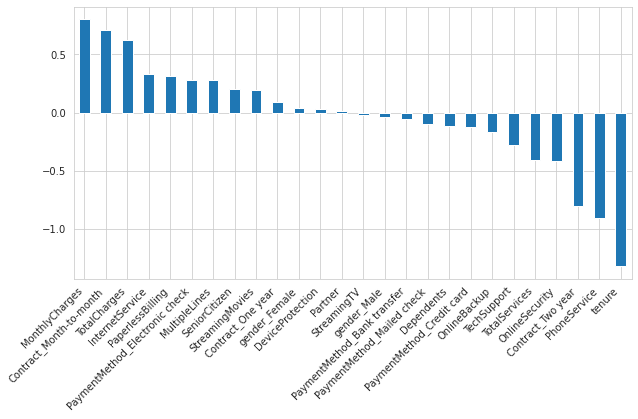

In [50]:
# Feature importance
lr_weights = pd.Series(lr_model.coef_[0], index=X.columns.values)

plt.figure(figsize=(10,5))
lr_weights.sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

#### **Observations**

* Phone Service along with tenure has the most negative relation with Churn as predicted by the Logistic Regression model.
* Having a 2-year contract reduces the probability of Churn.
* Monthly Charges, Month-to-month Contracts, Total Charges, and Internet Service can lead to higher churn rates.

### 2. Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a test on a feature ([source](https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96#:~:text=Decision%20tree%20is%20one%20of,set%20based%20on%20different%20conditions)).

#### **Model Creation**

In [51]:
# Running decision tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### **Prediction**

In [52]:
# Predict y (Churn)
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

#### **Model Evaluation**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3635
           1       1.00      1.00      1.00      1295

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930

Accuracy (training):  0.9983772819472616
Precision (testing):  0.4835766423357664
Recall (training):  0.9953667953667954
F1-score (training):  0.9969064191802012


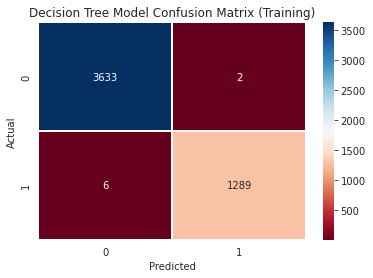

In [53]:
# Training evaluation
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Decision Tree Model Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (training): ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (training): ", metrics.recall_score(y_train, y_train_pred))
print("F1-score (training): ", metrics.f1_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1539
           1       0.48      0.46      0.47       574

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113

Accuracy (testing):  0.7198296261239944
Precision (testing):  0.4835766423357664
Recall (testing):  0.4616724738675958
F1-score (testing):  0.4723707664884135


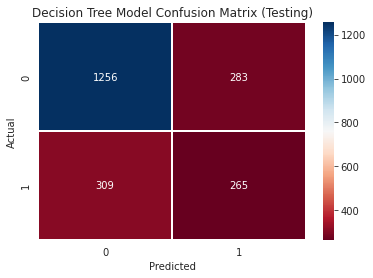

In [54]:
# Testing evaluation
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Decision Tree Model Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (testing): ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (testing): ", metrics.recall_score(y_test, y_test_pred))
print("F1-score (testing): ", metrics.f1_score(y_test, y_test_pred))

#### **AUC-ROC Curve**

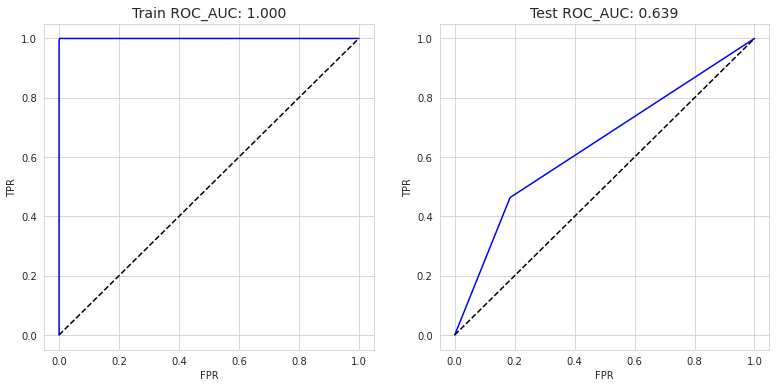

In [55]:
plot_roc_curve(X_train, y_train, X_test, y_test, dt_model)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

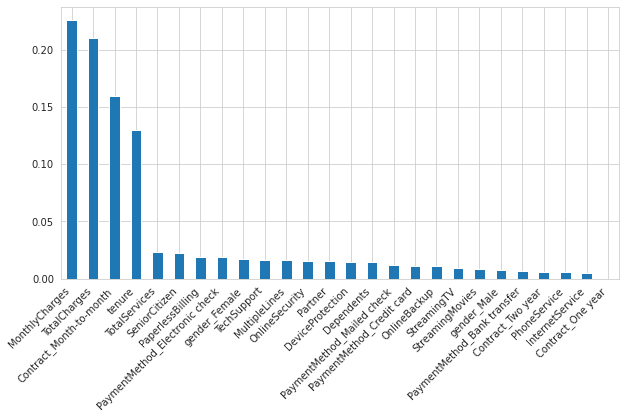

In [56]:
# Feature importance
dt_weights = pd.Series(dt_model.feature_importances_, index=X.columns.values)

plt.figure(figsize=(10,5))
dt_weights.sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

#### **Observations**

* The Decision Tree model has Monthly Charges, Total Charges, and Month-to-month Contracts as the most important features to predict Churn. 
* One-yea Contract is likely to be the unimportant feature to predict Churn.

### 3. Random Forest

Random forest consists of a large number of individual decision trees that operate as an ensemble ([source](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)).

#### **Model Creation**

In [57]:
# Running random forest model
from sklearn.ensemble import RandomForestClassifier
rr_model = RandomForestClassifier(random_state=42)
rr_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### **Prediction**

In [58]:
# Predict y (Churn)
y_train_pred = rr_model.predict(X_train)
y_test_pred = rr_model.predict(X_test)

#### **Model Evaluation**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3635
           1       1.00      1.00      1.00      1295

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930

Accuracy (training):  0.9983772819472616
Precision (testing):  0.6561743341404358
Recall (training):  0.9984555984555985
F1-score (training):  0.9969159599074787


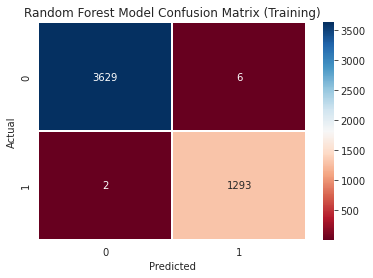

In [59]:
# Training evaluation
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Random Forest Model Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (training): ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (training): ", metrics.recall_score(y_train, y_train_pred))
print("F1-score (training): ", metrics.f1_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Accuracy (testing):  0.7893989588263133
Precision (testing):  0.6561743341404358
Recall (testing):  0.4721254355400697
F1-score (testing):  0.5491388044579534


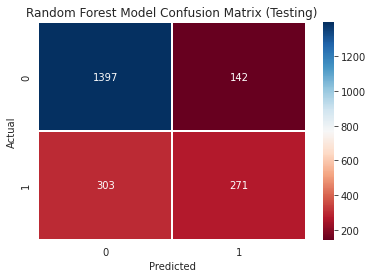

In [60]:
# Testing evaluation
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Random Forest Model Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (testing): ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (testing): ", metrics.recall_score(y_test, y_test_pred))
print("F1-score (testing): ", metrics.f1_score(y_test, y_test_pred))

#### **AUC-ROC Curve**

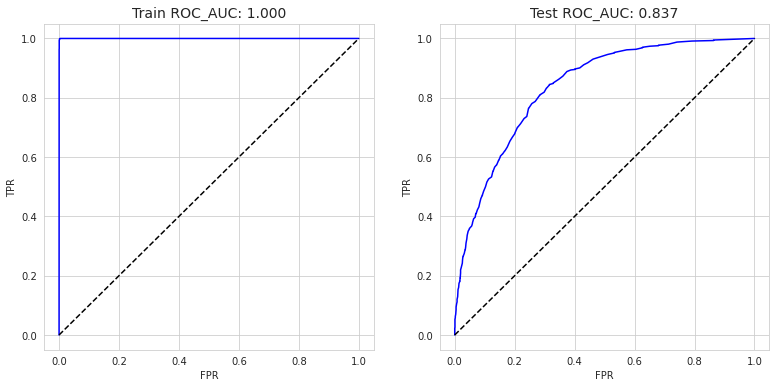

In [61]:
plot_roc_curve(X_train, y_train, X_test, y_test, rr_model)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

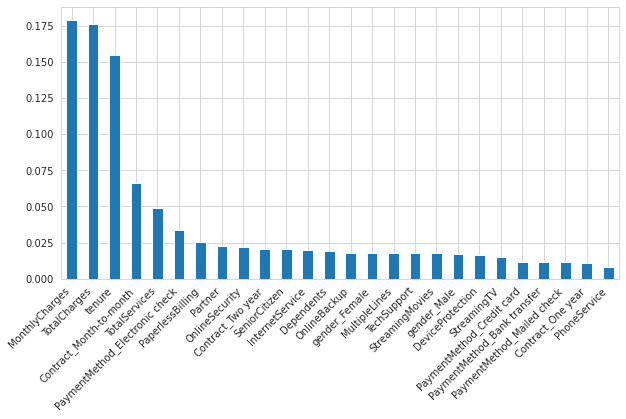

In [62]:
# Feature importance
rr_weights = pd.Series(rr_model.feature_importances_, index=X.columns.values)

plt.figure(figsize=(10,5))
rr_weights.sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

#### **Observations**

* From the Random Forest algorithm, Monthly Charges, Total Charges, and Tenure are the most important features to predict Churn.
* Phone Service is the least important feature to predict Churn.

### 4. Support Vector Machine
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points ([source](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)).

#### **Model Creation**

In [63]:
# Running support vector machine model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True, random_state=42) 
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

#### **Prediction**

In [64]:
# Predict y (Churn)
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

#### **Model Evaluation**

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3635
           1       0.65      0.52      0.57      1295

    accuracy                           0.80      4930
   macro avg       0.74      0.71      0.72      4930
weighted avg       0.79      0.80      0.79      4930

Accuracy (training):  0.798580121703854
Precision (testing):  0.6764705882352942
Recall (training):  0.5173745173745173
F1-score (training):  0.574367766823832


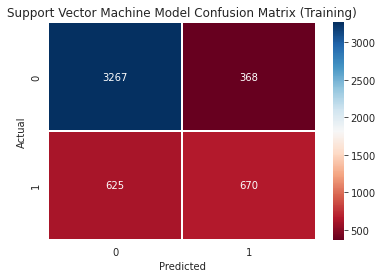

In [65]:
# Training evaluation
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Support Vector Machine Model Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (training): ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (training): ", metrics.recall_score(y_train, y_train_pred))
print("F1-score (training): ", metrics.f1_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.56      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Accuracy (testing):  0.8078561287269286
Precision (testing):  0.6764705882352942
Recall (testing):  0.5609756097560976
F1-score (testing):  0.6133333333333334


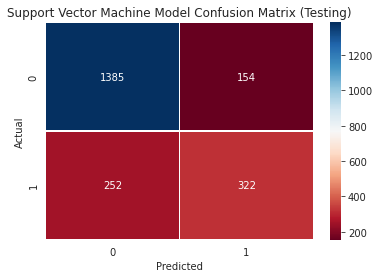

In [66]:
# Testing evaluation
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Support Vector Machine Model Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (testing): ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (testing): ", metrics.recall_score(y_test, y_test_pred))
print("F1-score (testing): ", metrics.f1_score(y_test, y_test_pred))

#### **AUC-ROC Curve**

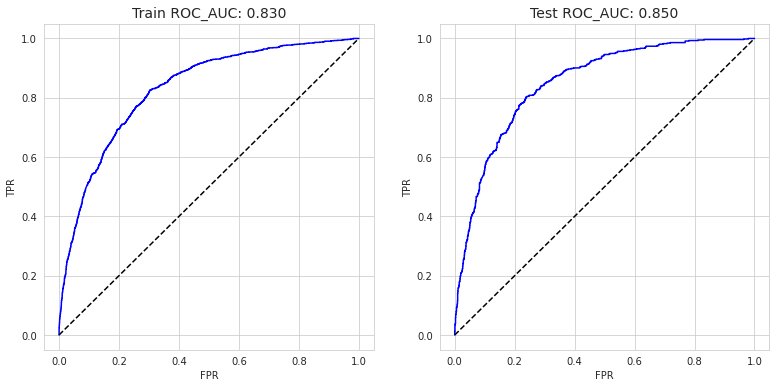

In [67]:
plot_roc_curve(X_train, y_train, X_test, y_test, svm_model)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

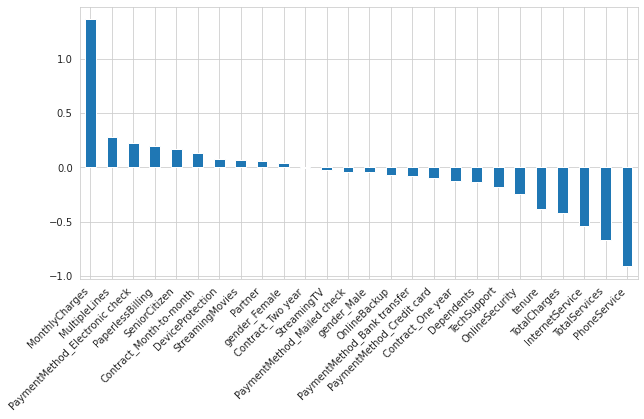

In [68]:
# Feature importance
svm_weights = pd.Series(svm_model.coef_[0], index=X.columns.values)

plt.figure(figsize=(10,5))
svm_weights.sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

#### **Observations**

* With the Support Vector Machine algorithm using a linear kernel, it's found that Phone Service, Total Services, and Internet Service have the most negative relation with Churn.
* Monthly Charges can lead to higher churn rates.

### 5. XGBoost

eXtreme Gradient Boosting (XGBoost) is a scalable and improved version of the gradient boosting algorithm designed for efficacy, computational speed and model performance ([source](https://medium.com/sfu-cspmp/xgboost-a-deep-dive-into-boosting-f06c9c41349)).

#### **Model Creation**

In [69]:
# Running XGBoost model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42) 
xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

#### **Prediction**

In [70]:
# Predict y (Churn)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

#### **Model Evaluation**

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3635
           1       0.71      0.56      0.62      1295

    accuracy                           0.82      4930
   macro avg       0.78      0.74      0.75      4930
weighted avg       0.82      0.82      0.82      4930

Accuracy (training):  0.8235294117647058
Precision (testing):  0.668859649122807
Recall (training):  0.5583011583011583
F1-score (training):  0.6243523316062176


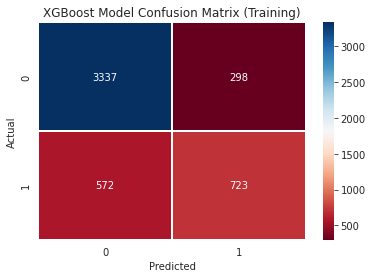

In [71]:
# Training evaluation
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('XGBoost Model Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (training): ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (training): ", metrics.recall_score(y_train, y_train_pred))
print("F1-score (training): ", metrics.f1_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy (testing):  0.8012304779933743
Precision (testing):  0.668859649122807
Recall (testing):  0.5313588850174216
F1-score (testing):  0.5922330097087379


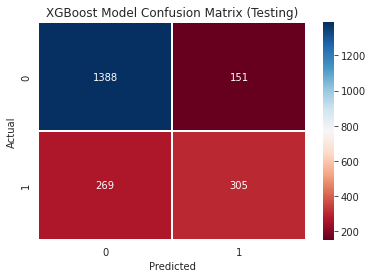

In [72]:
# Testing evaluation
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('XGBoost Model Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (testing): ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (testing): ", metrics.recall_score(y_test, y_test_pred))
print("F1-score (testing): ", metrics.f1_score(y_test, y_test_pred))

#### **AUC-ROC Curve**

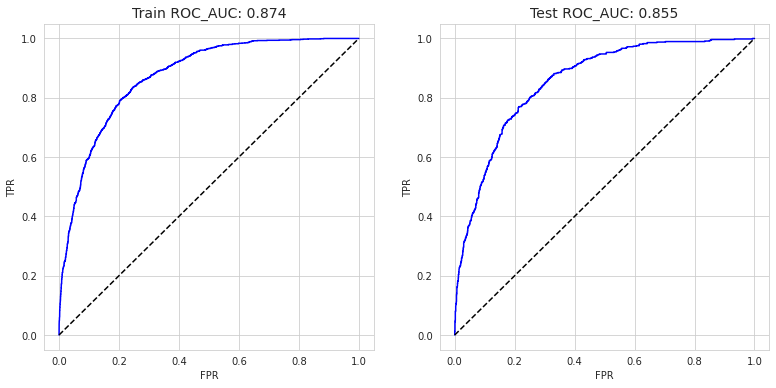

In [73]:
plot_roc_curve(X_train, y_train, X_test, y_test, xgb_model)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

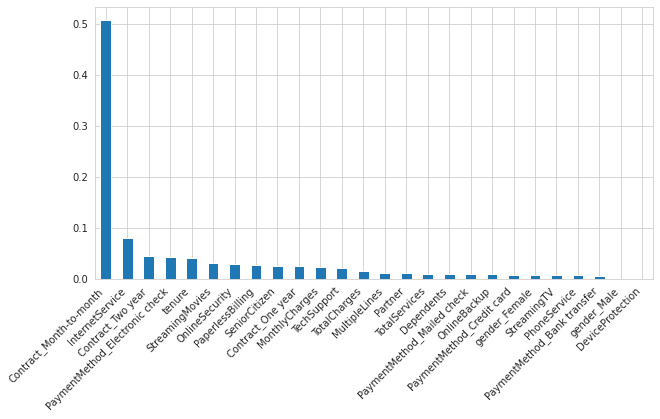

In [74]:
# Feature importance
xgb_weights = pd.Series(xgb_model.feature_importances_, index=X.columns.values)

plt.figure(figsize=(10,5))
xgb_weights.sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

#### **Observations**

* Using the XGBoost algorithm, Month-to-month Contract is the most important feature to predict Churn. 
* Device Protection and Gender are likely to be the unimportant features to predict Churn.

### 6. AdaBoost

Adaptive Boosting (AdaBoost) works by putting more weight on difficult to classify instances and less on those already handled well ([source](https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)).

#### **Model Creation**

In [75]:
# Running AdaBoost model
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=42) 
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

#### **Prediction**

In [76]:
# Predict y (Churn)
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

#### **Model Evaluation**

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3635
           1       0.66      0.53      0.59      1295

    accuracy                           0.81      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.80      0.81      0.80      4930

Accuracy (training):  0.8052738336713996
Precision (testing):  0.6579520697167756
Recall (training):  0.5266409266409267
F1-score (training):  0.5869191049913941


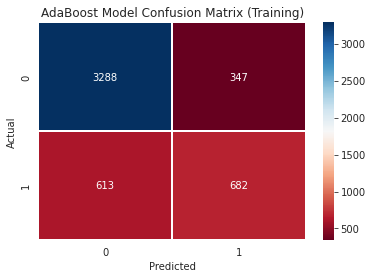

In [77]:
# Training evaluation
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('AdaBoost Model Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (training): ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (training): ", metrics.recall_score(y_train, y_train_pred))
print("F1-score (training): ", metrics.f1_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.66      0.53      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy (testing):  0.7969711310932324
Precision (testing):  0.6579520697167756
Recall (testing):  0.5261324041811847
F1-score (testing):  0.5847047434656341


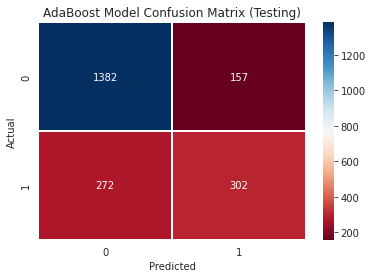

In [78]:
# Testing evaluation
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('AdaBoost Model Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (testing): ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (testing): ", metrics.recall_score(y_test, y_test_pred))
print("F1-score (testing): ", metrics.f1_score(y_test, y_test_pred))

#### **AUC-ROC Curve**

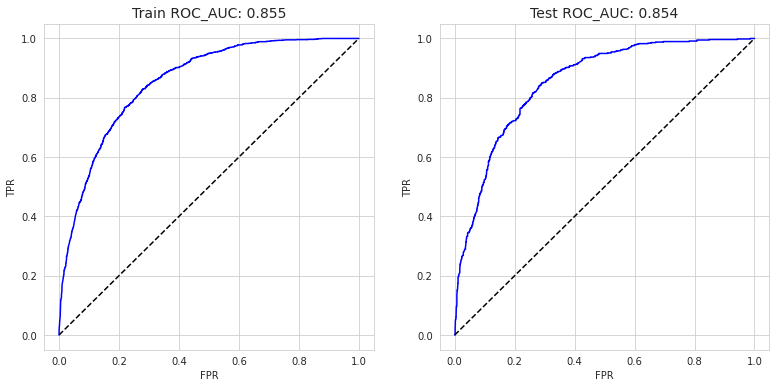

In [79]:
plot_roc_curve(X_train, y_train, X_test, y_test, ada_model)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

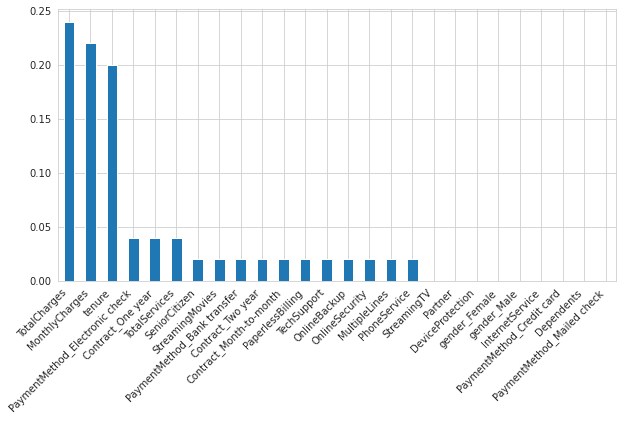

In [80]:
# Feature importance
ada_weights = pd.Series(ada_model.feature_importances_, index=X.columns.values)

plt.figure(figsize=(10,5))
ada_weights.sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

#### **Observations**

* From the AdaBoost algorithm, Total Charges, Monthly Charges, and Tenure are the most important features to predict Churn. This result is very similar to that of the Random Forest model. 
* Payment Method, Dependents, Internet Service, Gender, Device Protection, Partner, and StreamingTV are likely to be the unimportant features to predict Churn.

### 7. Gradient Boosting

While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function ([source](https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab)).


#### **Model Creation**

In [81]:
# Running gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42) 
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

#### **Prediction**

In [82]:
# Predict y (Churn)
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

#### **Model Evaluation**

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3635
           1       0.72      0.57      0.64      1295

    accuracy                           0.83      4930
   macro avg       0.79      0.75      0.76      4930
weighted avg       0.82      0.83      0.82      4930

Accuracy (training):  0.8298174442190669
Precision (testing):  0.6727272727272727
Recall (training):  0.5722007722007721
F1-score (training):  0.6385178802240413


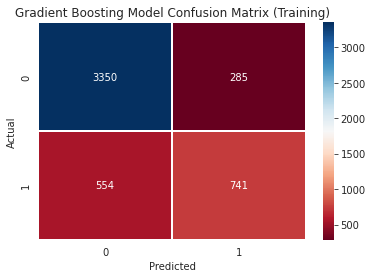

In [83]:
# Training evaluation
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Gradient Boosting Model Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (training): ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (training): ", metrics.recall_score(y_train, y_train_pred))
print("F1-score (training): ", metrics.f1_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.52      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy (testing):  0.8002839564600095
Precision (testing):  0.6727272727272727
Recall (testing):  0.5156794425087108
F1-score (testing):  0.5838264299802762


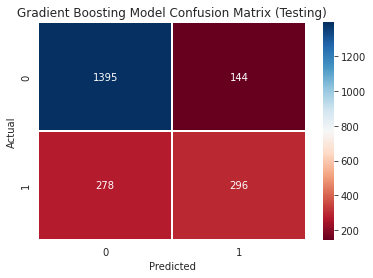

In [84]:
# Testing evaluation
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Gradient Boosting Model Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation scores
print("Accuracy (testing): ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision (testing): ", metrics.precision_score(y_test, y_test_pred))
print("Recall (testing): ", metrics.recall_score(y_test, y_test_pred))
print("F1-score (testing): ", metrics.f1_score(y_test, y_test_pred))

#### **AUC-ROC Curve**

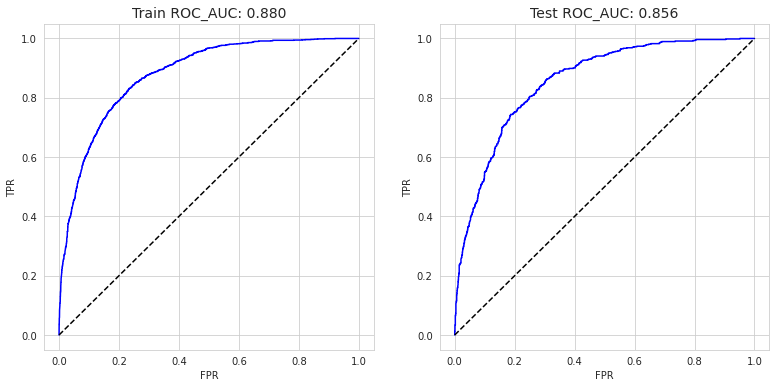

In [85]:
plot_roc_curve(X_train, y_train, X_test, y_test, gb_model)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

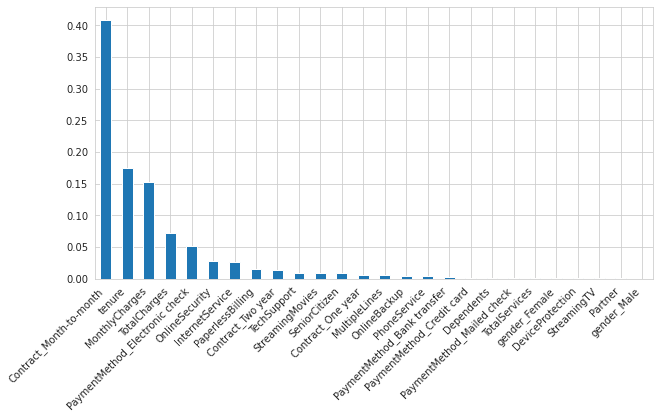

In [86]:
# Feature importance
gb_weights = pd.Series(gb_model.feature_importances_, index=X.columns.values)

plt.figure(figsize=(10,5))
gb_weights.sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

#### **Observations**

* Using the Gradient Boosting algorithm, Month-to-month Contract is the most important feature to predict Churn. This result is very similar to that of the XGBoost model. 
* Gender, Partner, StreamingTV, Device Protection, Total Services, and Dependents are likely to be the unimportant features to predict Churn.

---
## **Conclusion and Recommendation**

From all the visualizations and analyses performed, the conclusions are as follows.
* Customer churn is definitely bad for Telco Company's profitability. Various strategies can be implemented to lower customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. 
* From data exploration, it's found that the higher the customers are charged, the more likely they are to churn, and the churn mostly occurs in the first 0 to 5 months customers subscribed. Moreover, customers who signed up for Phone and Internet Services are more likely to churn, this indicates that these services need improvements to lower the churn rate.
* Several predictive models, such as Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), XGBoost, AdaBoost, and Gradient Boosting are developed and the best one out of them will be Logistic Regression. For this case, the Logistic Regression model is chosen because it is easier to implement, interpret, and very efficient to train for many binary classification tasks. It can also interpret model coefficients as indicators of feature importance.

The resulting recommendations are as follows.
- Telco Company's Improvement
  - Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. 
  - The results from almost every model made show that Telco Company's pricing needs to be evaluated and its Internet Service also needs to be improved to keep customers loyal and don't churn.
  - For this case, using the Logistic Regression model, to lower the churn rate, Telco Company needs to pay attention to Monthly Charges, Month-to-month Contracts, Total Charges, and Internet Service as they are the ones who contributed to churn rates more.
  - Surveys on customers who have already churned can be conducted to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.
- Modeling Improvement
  - The model selection may be according to what evaluation metric is chosen and there are still more models that can be explored to improve the prediction of customer churn. For this case, the Gradient Boosting model can also be used as it has the highest F1-score among other models.
  - Hyperparameter tuning can be conducted as it is choosing a set of optimal hyperparameters for a learning algorithm that leads to improvement in model performance.
  - Model performance can also be improved by optimizing feature selection, that is by isolating the most consistent, non-redundant, and relevant features to use in model construction and selecting those features which contribute most to the prediction.
